# Fashion MNIST dataset --- Shallow Net

<span style="color:red;">Aims:</span><br>
    1-New Dataset<br>
    2-Understanding the diffrence between mean_squared_error and categorical_crossentropy<br>
    3-Understanding of 'Sigmoid', 'Softmax', 'Tanh' and 'Relu' activation layers.<br>

### Loading Dependencies

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading Data

In [2]:
(X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()

### Exploring Data

In [3]:
print("X_train Shape:",X_train.shape)
print("Y_test Shape:",Y_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",X_test.shape)

X_train Shape: (60000, 28, 28)
Y_test Shape: (60000,)
X_test Shape: (10000, 28, 28)
Y_test Shape: (10000, 28, 28)


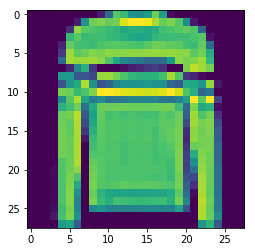

In [4]:
plt.imshow(X_train[5])

In [5]:
print(Y_train[5])

2


In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(Y_train,n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)

### Creating the Model

In [8]:
model = Sequential()
model.add(Dense((64), activation="sigmoid", input_shape=(784,)))
model.add(Dense((10), activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Configuring the model

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

### Training The Model

In [10]:
model.fit(X_train,Y_train, batch_size=128, epochs=20, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.9845 - acc: 0.6912 - val_loss: 0.7536 - val_acc: 0.7500
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.6979 - acc: 0.7549 - val_loss: 0.6674 - val_acc: 0.7594
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6515 - acc: 0.7694 - val_loss: 0.6692 - val_acc: 0.7516
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.6355 - acc: 0.7719 - val_loss: 0.6568 - val_acc: 0.7674
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6210 - acc: 0.7698 - val_loss: 0.6514 - val_acc: 0.7479
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.6330 - acc: 0.7684 - val_loss: 0.6307 - val_acc: 0.7743
Epoch 7/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6385 - acc: 0.7686 - val_loss: 0.6712 - val_acc

### Checking Model Prediction

In [11]:
Prediction = model.predict([[X_train[2]]])
print(Prediction)

[[4.2545497e-02 3.1899390e-01 5.8111832e-02 2.2781886e-01 7.1669526e-02
  2.1713313e-04 3.2613005e-02 1.3830923e-02 6.4642791e-04 2.3355296e-01]]


In [12]:
max_num = Prediction.max()
Prediction = Prediction.tolist()
x = 0;
Prediction = Prediction[0]
for items in Prediction:
    if(items==max_num):
        break;
    x+=1
print(x)

1
